In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [25]:
traindata = pd.read_csv("../../data/port1_sk.csv")
testdata =  pd.read_csv("../../data/test.csv")
test = pd.read_csv("../../data/DatasetF123.csv")
malicious = open("../../data/ip_address.txt")

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,4,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
traindata.head()

,Unnamed: 0,Src Port,Dest Port,Protocol,Packet
0,0,1,1,2,1
1,1,0,0,2,1
2,2,0,0,0,1
3,5,1,1,1,1
4,6,1,1,2,1


In [27]:
testdata.head()

,Src Port,Dest Port,Protocol
0,1,1,2
1,1,1,3
2,1,1,2
3,1,1,3
4,1,1,2


In [38]:
#testdata = testdata.sample(20000)
test.head()

,Date,Time/Seq,SMAC,SIP,Sport,DMAC,DIP,Dport,Protocol,GoodBad,AllowBlock,Comments
0,20180408,4,NaN,192.168.0.0,1390,NaN,149.171.126.6,53,udp,NaN,NaN,NaN
1,20180408,11,D-LinkIn_c5:17:5a,NaN,NaN,IntelCor_c3:41:78,NaN,NaN,EAPOL,NaN,NaN,Key (Message 2 of 4)
2,20180408,14,NaN,192.168.0.0,33661,NaN,149.171.126.9,1024,udp,NaN,NaN,NaN
3,20180408,21,D-LinkIn_c5:17:5a,NaN,NaN,IntelCor_c3:41:78,NaN,NaN,EAPOL,NaN,NaN,Key (Message 4 of 4)
4,20180408,24,NaN,192.168.0.6,1464,NaN,149.171.126.7,53,udp,NaN,NaN,NaN


In [45]:
# traindata = traindata.drop('None', axis=1)
test.head()

,Date,Time/Seq,SMAC,SIP,Sport,DMAC,DIP,Dport,Protocol,GoodBad,AllowBlock,Comments
0,20180408,4,NaN,192.168.0.0,1390,NaN,149.171.126.6,53,udp,NaN,NaN,NaN
1,20180408,11,D-LinkIn_c5:17:5a,NaN,NaN,IntelCor_c3:41:78,NaN,NaN,EAPOL,NaN,NaN,Key (Message 2 of 4)
2,20180408,14,NaN,192.168.0.0,33661,NaN,149.171.126.9,1024,udp,NaN,NaN,NaN
3,20180408,21,D-LinkIn_c5:17:5a,NaN,NaN,IntelCor_c3:41:78,NaN,NaN,EAPOL,NaN,NaN,Key (Message 4 of 4)
4,20180408,24,NaN,192.168.0.6,1464,NaN,149.171.126.7,53,udp,NaN,NaN,NaN


In [12]:
testdata.head()

,Src Port,Dest Port,Protocol
0,1,1,2
1,1,1,3
2,1,1,2
3,1,1,3
4,1,1,2


In [16]:
traindata = traindata.dropna(axis=0, how='any')

In [17]:
testdata = testdata.dropna(axis=0, how='any')

In [28]:
X_train = [traindata.columns[1], traindata.columns[2], traindata.columns[3]]
y_train = traindata.columns[4]

In [29]:
X_test = [testdata.columns[0], testdata.columns[1], testdata.columns[2]]
# y_test = testdata.columns[3]

In [30]:
n_features = traindata[X_train].shape[1]

In [31]:
traindata[y_train].value_counts()

1    300000
0      2000
Name: Packet, dtype: int64

In [18]:
sns.countplot(x = y_train, data=traindata, palette='hls')

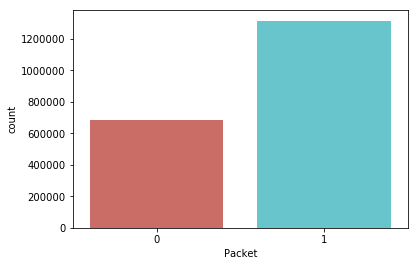

In [19]:
plt.show()

In [20]:
traindata.groupby(y_train).mean()

,Src Port,Dest Port,Protocol
Packet,,,
0,0.561283,0.855839,2.891846
1,0.756389,0.505917,1.249505


In [25]:
traindata.groupby(X_train[0]).mean()

,Dest Port,Protocol,Packet
Src Port,,,
0,0.522492,2.359211,0.515241
1,0.672618,1.567075,0.720632


In [26]:
traindata.groupby(X_train[1]).mean()

,Src Port,Protocol,Packet
Dest Port,,,
0,0.603492,1.724016,0.867731
1,0.740786,1.866296,0.530850


In [27]:
traindata.groupby(X_train[2]).mean()

,Src Port,Dest Port,Packet
Protocol,,,
0,0.000000,0.000000,0.943118
1,0.907702,0.666771,0.984563
2,0.871252,0.658867,0.542231
3,0.000000,0.963359,0.022548
4,0.000000,0.626283,0.024777
5,0.194896,0.842227,0.348028
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,0.000000
8,1.000000,0.250000,1.000000


In [28]:
%matplotlib inline
pd.crosstab(traindata.Source_Port,traindata.Packet).plot(kind='bar')
plt.title('Frequency for Source Port')
plt.xlabel('Source Port')
plt.ylabel('Packet')
plt.savefig('src-port-packet')

AttributeError: 'DataFrame' object has no attribute 'Source_Port'

In [ ]:
%matplotlib inline
pd.crosstab(traindata.Destination_Port,traindata.Packet).plot(kind='bar')
plt.title('Frequency for Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Packet')
plt.savefig('dst-port-packet')

In [ ]:
%matplotlib inline
plt.figure(figsize=(1,2))
pd.crosstab(traindata.Protocol,traindata.Packet).plot(kind='bar')
plt.title('Frequency for Protocol')
plt.xlabel('Protocol')
plt.ylabel('Packet')
plt.savefig('protocol-packet')

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(traindata[X_train], traindata[y_train], test_size=0.20, random_state=42)

In [ ]:
traindata[X_train].shape

In [32]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(traindata[X_train], traindata[y_train])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True]
[1 1 1]


In [33]:
import statsmodels.api as sm
logit_model=sm.Logit(traindata[y_train],traindata[X_train])
result=logit_model.fit()
print(result.summary())

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.239227
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Packet   No. Observations:               302000
Model:                          Logit   Df Residuals:                   301997
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Apr 2018   Pseudo R-squ.:                  -5.007
Time:                        11:57:21   Log-Likelihood:                -72246.
converged:                       True   LL-Null:                       -12028.
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Src Port       0.3963      0.038     10.503      0.000       0.322       0.470
Dest Port      0.5289      0.

In [34]:
logreg = LogisticRegression()
logreg.fit(traindata[X_train], traindata[y_train])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
y_pred = logreg.predict(testdata[X_test])
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(testdata[X_test], testdata[y_test])))

In [42]:
fp = open("test-results-2.txt","a")
for i in y_pred:
    fp.write(str(i)+"\n")

In [37]:
print(list(y_pred).count(1))
print(list(y_pred).count(0))



673125
773


In [39]:
test.head()

,Date,Time/Seq,SMAC,SIP,Sport,DMAC,DIP,Dport,Protocol,GoodBad,AllowBlock,Comments
0,20180408,4,NaN,192.168.0.0,1390,NaN,149.171.126.6,53,udp,NaN,NaN,NaN
1,20180408,11,D-LinkIn_c5:17:5a,NaN,NaN,IntelCor_c3:41:78,NaN,NaN,EAPOL,NaN,NaN,Key (Message 2 of 4)
2,20180408,14,NaN,192.168.0.0,33661,NaN,149.171.126.9,1024,udp,NaN,NaN,NaN
3,20180408,21,D-LinkIn_c5:17:5a,NaN,NaN,IntelCor_c3:41:78,NaN,NaN,EAPOL,NaN,NaN,Key (Message 4 of 4)
4,20180408,24,NaN,192.168.0.6,1464,NaN,149.171.126.7,53,udp,NaN,NaN,NaN


In [41]:
#fq = open("resultant-data.csv")
test["GoodBad"] = y_pred[test.Date]

IndexError: index 20180408 is out of bounds for axis 1 with size 673898

In [33]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, traindata[X_train], traindata[y_train], cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.849


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testdata[y_test], y_pred)
print(confusion_matrix)

[[    0     0     0     0]
 [ 5996     0     0     0]
 [13976     0     0     0]
 [   28     0     0     0]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(testdata[y_test], y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00      5996
          2       0.00      0.00      0.00     13976
          3       0.00      0.00      0.00        28

avg / total       0.00      0.00      0.00     20000



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(testdata[y_test], logreg.predict(testdata[X_test]))
fpr, tpr, thresholds = roc_curve(testdata[y_test], logreg.predict_proba(testdata[X_test])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [16]:
mal = malicious.read()
print(mal)

178.137.87.242
46.148.22.18
201.18.18.173
46.148.18.162
37.187.129.166
91.200.12.91
195.154.241.166
89.234.157.254
176.126.252.12
77.247.181.165
195.154.250.216
176.10.104.240
195.154.243.31
195.154.241.119

213.251.182.110

195.154.240.176

195.154.251.120

195.154.240.246

192.42.116.16

188.138.9.49

85.25.103.119

213.251.182.115

185.129.148.203

91.207.7.54

5.79.68.161

88.80.196.2

176.126.252.11

46.118.156.191

213.251.182.111

92.63.87.97

210.210.178.20

213.251.182.114

37.130.227.133

94.242.246.23

60.12.119.200

46.165.230.5

91.208.99.2
173.208.177.59

91.109.247.173

194.150.168.95

89.31.57.5

77.247.181.162

94.242.246.24

1.234.83.77

77.247.181.163

80.255.192.237

91.200.12.50

91.200.12.22

120.203.25.58

176.31.51.199

188.143.233.136

213.251.182.103

213.60.51.127

91.200.12.86

155.133.82.112
207.244.70.35

185.92.72.33

176.10.104.243

91.200.12.65

35.0.127.52

58.62.55.130

213.251.182.105

83.96.132.85

178.217.187.39

171.25.193.20

213.251.182.107

85.

In [17]:
mal.split("\n")

['178.137.87.242',
 '46.148.22.18',
 '201.18.18.173',
 '46.148.18.162',
 '37.187.129.166',
 '91.200.12.91',
 '195.154.241.166',
 '89.234.157.254',
 '176.126.252.12',
 '77.247.181.165',
 '195.154.250.216',
 '176.10.104.240',
 '195.154.243.31',
 '195.154.241.119',
 '',
 '213.251.182.110',
 '',
 '195.154.240.176',
 '',
 '195.154.251.120',
 '',
 '195.154.240.246',
 '',
 '192.42.116.16',
 '',
 '188.138.9.49',
 '',
 '85.25.103.119',
 '',
 '213.251.182.115',
 '',
 '185.129.148.203',
 '',
 '91.207.7.54',
 '',
 '5.79.68.161',
 '',
 '88.80.196.2',
 '',
 '176.126.252.11',
 '',
 '46.118.156.191',
 '',
 '213.251.182.111',
 '',
 '92.63.87.97',
 '',
 '210.210.178.20',
 '',
 '213.251.182.114',
 '',
 '37.130.227.133',
 '',
 '94.242.246.23',
 '',
 '60.12.119.200',
 '',
 '46.165.230.5',
 '',
 '91.208.99.2',
 '173.208.177.59',
 '',
 '91.109.247.173',
 '',
 '194.150.168.95',
 '',
 '89.31.57.5',
 '',
 '77.247.181.162',
 '',
 '94.242.246.24',
 '',
 '1.234.83.77',
 '',
 '77.247.181.163',
 '',
 '80.255.192.237

In [20]:
list_ip = test["DIP"].dropna()

In [24]:
for i in list_ip:
    if i in mal:
        print(i)
    else:
        